In [94]:
import spectral as sp
import numpy as np
import matplotlib.pyplot as plt
import glob
import planck_wv
import copy
from scipy.signal import savgol_filter
import pandas as pd

In [95]:
bs_path = r'E:\efrati\termal_bar\eggs'
spec_libs = glob.glob(bs_path+'\sl_*.hdr', recursive=True)

In [102]:
def make_emissivity(speclib):
    planck_curves = copy.deepcopy(speclib) # for planck curves
    temperature = speclib
    idx_start = np.where(np.array(speclib.bands.centers) == 8.01494)[0][0]
    idx_stop = np.where(np.array(speclib.bands.centers) == 11.671907)[0][0]
    speclib.spectra = speclib.spectra[:,idx_start:idx_stop+1]
    spectra = speclib.spectra
    num_of_spectra = spectra.shape[0]
    wavelengths = np.array(speclib.bands.centers[idx_start:idx_stop+1])

    planck = []
    temp = []

    for i in range(num_of_spectra):
        L, T = planck_wv.planckFitting(spectra[i,:], wavelengths)
        planck.append(L)
        temp.append(T)
    planck = np.array(planck)
    temp = np.array(temp)

    
    planck_curves.spectra = planck
    samples_idx = [i.split(' ')[0] != 'gold' for i in speclib.names]
    infragold_idx = [i.split(' ')[0] == 'gold' for i in speclib.names]
    samples_names = [i.split(' ')[0] for i in speclib.names if i.split(' ')[0] != 'gold']
    
    emissivity = ((savgol_filter(speclib.spectra[samples_idx],11,1) - speclib.spectra[infragold_idx]) \
                   / (planck_curves.spectra[samples_idx] - speclib.spectra[infragold_idx]))
    
    return wavelengths, samples_names, emissivity

In [121]:
speclib.metadata

{'description': 'New spectral library file [Sun Jul 11 08:53:03 2021]',
 'samples': 121,
 'lines': 91,
 'bands': '1',
 'header offset': '0',
 'file type': 'ENVI Spectral Library',
 'data type': '5',
 'interleave': 'bsq',
 'sensor type': 'Unknown',
 'byte order': '0',
 'wavelength units': 'Nanometers',
 'reflectance scale factor': '1.000000',
 'z plot titles': ['Wavelength', 'Value'],
 'band names': ['Spectral Library'],
 'data ignore value': 'NaN'}

In [125]:
# speclib = sp.io.envi.open(spec_libs[0])
# wavelengths, samples_names, emissivity_ar = make_emissivity(speclib)
# emissivity = dict(zip(samples_names, emissivity))

#create and save as speclib
speclib_emiss = speclib
speclib_emiss.spectra = emissivity_ar
speclib_emiss.names = samples_names
speclib_emiss.bands.centers = wavelengths
speclib_emiss.metadata['lines'] = 91
speclib_emiss.metadata['samples'] = 121
speclib_emiss.save(spec_libs[0][:-4] + '_emissivity')

In [116]:
df_emis = pd.DataFrame.from_dict(emissivity,orient='index', columns=wavelengths)
df_emis.shape

(91, 121)

ValueError: x and y must have same first dimension, but have shapes (121,) and (91, 121)

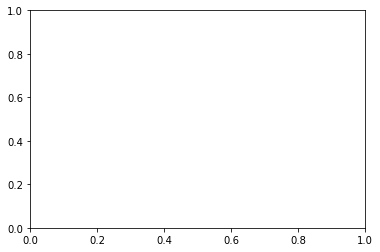

In [28]:
speclib = sp.io.envi.open(spec_libs[0])
for key, value in emissivity.items():
    plt.figure()
    plt.plot(speclib.bands.centers[17:138], value.squeeze(), label = key)
    plt.legend()

In [16]:
value.shape

(84,)

In [31]:
df_emis = pd.DataFrame.from_dict(emissivity,orient='index', columns=_)
df_emis.head()

ValueError: Must pass 2-d input. shape=(1, 91, 121)

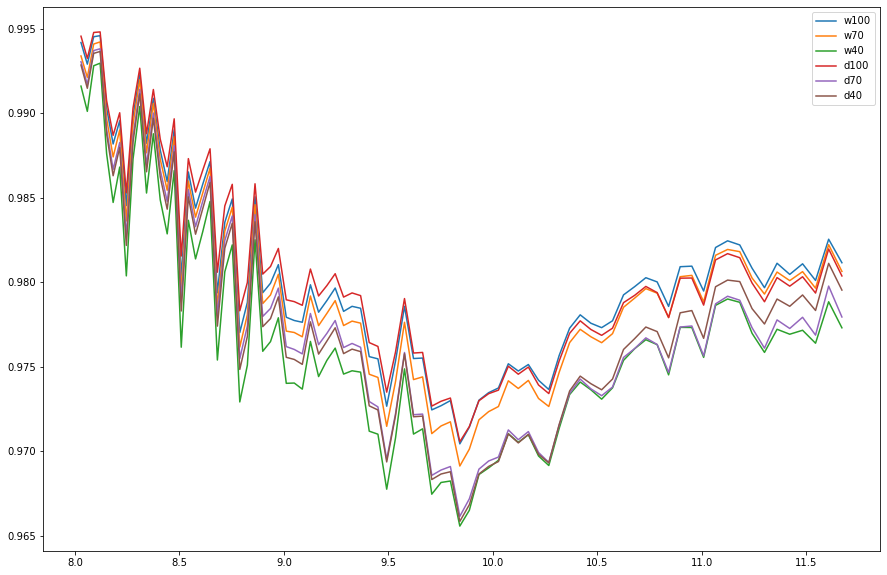

In [21]:
plt.figure(figsize=(15,10))
for key, value in groups.items():
    df_emis.loc[value].mean(axis=0).plot(label=key)
plt.legend()

w100


<Figure size 1080x720 with 0 Axes>

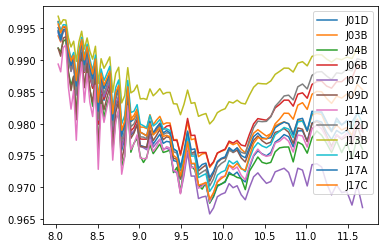

w70


<Figure size 1080x720 with 0 Axes>

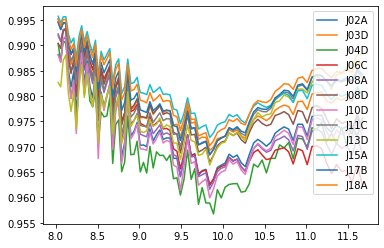

w40


<Figure size 1080x720 with 0 Axes>

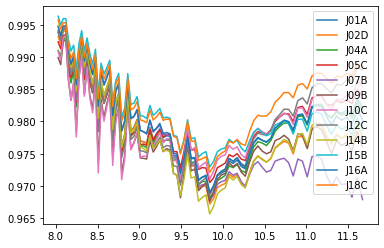

d100


<Figure size 1080x720 with 0 Axes>

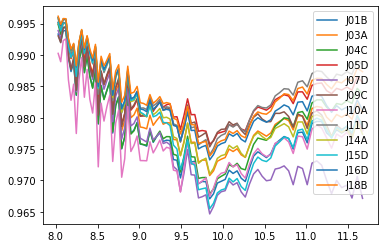

d70


<Figure size 1080x720 with 0 Axes>

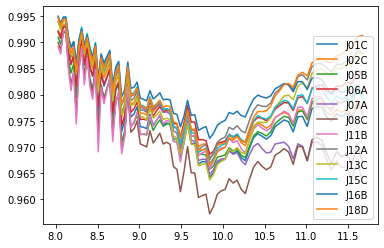

d40


<Figure size 1080x720 with 0 Axes>

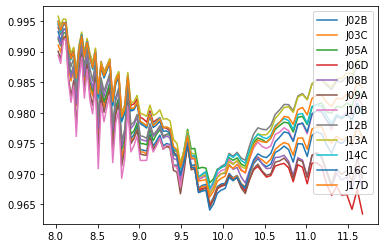

In [19]:
for key, value in groups.items():
    print (key)
    plt.figure(figsize=(15,10));
    df_emis.loc[value].T.plot();
    plt.legend()
    plt.show();
    